In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import sys
sys.path.append('/home/njr61/rds/hpc-work/spurious-concepts/ConceptBottleneck')

In [4]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
import torch.nn as nn
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [5]:
from ConceptBottleneck.CUB.models import ModelXtoC, ModelOracleCtoY
from ConceptBottleneck.CUB.dataset import load_data

In [6]:
from src.images import *
from src.util import *
from src.models import *
from src.plot import *

## Load Datasets

In [7]:
pretrained = True
freeze = False
num_classes = 200
num_attributes = 13
use_aux = True
expand_dim = 0
three_class = False
use_attr = True
no_img = False
batch_size = 64
uncertain_labels = False
image_dir = 'images'
num_class_attr = 2
resampling = False

In [8]:
BASE_DIR = ""
data_dir_small = "../cem/cem/CUB_small/preprocessed/"
data_dir_blur = "../cem/cem/CUB_blur/preprocessed/"
data_dir_tag = "../cem/cem/CUB_tag/preprocessed/"

In [9]:
train_data_path = os.path.join(BASE_DIR, data_dir_small, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [10]:
train_loader_small = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path, is_training=False)
val_loader_small = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

In [11]:
train_data_path = os.path.join(BASE_DIR, data_dir_blur, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [12]:
train_loader_blur = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path, is_training=False)
val_loader_blur = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

In [13]:
train_data_path = os.path.join(BASE_DIR, data_dir_tag, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [14]:
train_loader_tag = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path,is_training=False)
val_loader_tag = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

## Load Models

In [15]:
joint_location_small = "ConceptBottleneck/results/CUB_small/joint/best_model_42.pth"
joint_model_small = torch.load(joint_location_small,map_location=torch.device('cpu'))
r = joint_model_small.eval()

In [16]:
joint_location_blur = "ConceptBottleneck/results/CUB_blur/joint/best_model_42.pth"
joint_model_blur = torch.load(joint_location_blur,map_location=torch.device('cpu'))
r = joint_model_blur.eval()

In [17]:
joint_location_tag = "ConceptBottleneck/results/CUB_tag/joint/best_model_42.pth"
joint_model_tag = torch.load(joint_location_tag,map_location=torch.device('cpu'))
r = joint_model_tag.eval()

In [18]:
independent_concept_location_small = "ConceptBottleneck/results/CUB_small/independent/concept/best_model_42.pth"
independent_bottleneck_location_small = "ConceptBottleneck/results/CUB_small/independent/bottleneck/best_model_42.pth"
independent_concept_model_small = torch.load(independent_concept_location_small,map_location=torch.device('cpu'))
independent_bottleneck_model_small = torch.load(independent_bottleneck_location_small,map_location=torch.device('cpu'))
r = independent_concept_model_small.eval(), independent_bottleneck_model_small.eval()

In [36]:
sequential_concept_location_small = "ConceptBottleneck/results/CUB_small/sequential/concept/best_model_42.pth"
sequential_bottleneck_location_small = "ConceptBottleneck/results/CUB_small/sequential/bottleneck/best_model_42.pth"
sequential_concept_model_small = torch.load(sequential_concept_location_small,map_location=torch.device('cpu'))
sequential_bottleneck_model_small = torch.load(sequential_bottleneck_location_small,map_location=torch.device('cpu'))
r = sequential_concept_model_small.eval(), sequential_bottleneck_model_small.eval()

In [19]:
independent_concept_location_blur = "ConceptBottleneck/results/CUB_blur/independent/concept/best_model_42.pth"
independent_bottleneck_location_blur = "ConceptBottleneck/results/CUB_blur/independent/bottleneck/best_model_42.pth"
independent_concept_model_blur = torch.load(independent_concept_location_blur,map_location=torch.device('cpu'))
independent_bottleneck_model_blur = torch.load(independent_bottleneck_location_blur,map_location=torch.device('cpu'))
r = independent_concept_model_blur.eval(), independent_bottleneck_model_blur.eval()

In [37]:
sequential_concept_location_blur = "ConceptBottleneck/results/CUB_blur/sequential/concept/best_model_42.pth"
sequential_bottleneck_location_blur = "ConceptBottleneck/results/CUB_blur/sequential/bottleneck/best_model_42.pth"
sequential_concept_model_blur = torch.load(sequential_concept_location_blur,map_location=torch.device('cpu'))
sequential_bottleneck_model_blur = torch.load(sequential_bottleneck_location_blur,map_location=torch.device('cpu'))
r = sequential_concept_model_blur.eval(), sequential_bottleneck_model_blur.eval()

In [20]:
independent_concept_location_tag = "ConceptBottleneck/results/CUB_tag/independent/concept/best_model_42.pth"
independent_bottleneck_location_tag = "ConceptBottleneck/results/CUB_tag/independent/bottleneck/best_model_42.pth"
independent_concept_model_tag = torch.load(independent_concept_location_tag,map_location=torch.device('cpu'))
independent_bottleneck_model_tag = torch.load(independent_bottleneck_location_tag,map_location=torch.device('cpu'))
r = independent_concept_model_tag.eval(), independent_bottleneck_model_tag.eval()

In [24]:
sequential_concept_location_tag = "ConceptBottleneck/results/CUB_tag/sequential/concept/best_model_42.pth"
sequential_bottleneck_location_tag = "ConceptBottleneck/results/CUB_tag/sequential/bottleneck/best_model_42.pth"
sequential_concept_model_tag = torch.load(sequential_concept_location_tag,map_location=torch.device('cpu'))
sequential_bottleneck_model_tag = torch.load(sequential_bottleneck_location_tag,map_location=torch.device('cpu'))
r = sequential_concept_model_tag.eval(), sequential_bottleneck_model_tag.eval()

(Inception3(
   (Conv2d_1a_3x3): BasicConv2d(
     (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
     (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
   )
   (Conv2d_2a_3x3): BasicConv2d(
     (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
     (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
   )
   (Conv2d_2b_3x3): BasicConv2d(
     (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
   )
   (Conv2d_3b_1x1): BasicConv2d(
     (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
   )
   (Conv2d_4a_3x3): BasicConv2d(
     (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
     (bn): BatchNorm2d(192, eps=0.001, momentum

## Model Differences

In [25]:
get_accuracy(joint_model_small,run_joint_model,val_loader_small)

tensor(0.8986)

In [26]:
get_accuracy(joint_model_blur,run_joint_model,val_loader_blur)

tensor(0.8986)

In [27]:
get_accuracy(joint_model_tag,run_joint_model,val_loader_tag)

tensor(0.8551)

In [28]:
get_accuracy([independent_concept_model_small,independent_bottleneck_model_small],run_independent_model,val_loader_small)

tensor(0.4203)

In [29]:
get_accuracy([independent_concept_model_blur,independent_bottleneck_model_blur],run_independent_model,val_loader_blur)

tensor(0.0725)

In [30]:
get_accuracy([independent_concept_model_tag,independent_bottleneck_model_tag],run_independent_model,val_loader_tag)

tensor(0.1304)

In [31]:
get_accuracy_by_class(joint_model_small,run_joint_model,val_loader_small)

{8: 0.8888888888888888,
 0: 1.0,
 4: 1.0,
 2: 0.7142857142857143,
 10: 1.0,
 11: 1.0,
 3: 1.0,
 7: 0.6666666666666666,
 6: 0.5,
 1: 1.0,
 5: 0.6666666666666666,
 9: 1.0}

In [32]:
get_accuracy_by_class(joint_model_blur,run_joint_model,val_loader_blur)

{8: 1.0,
 0: 1.0,
 4: 0.8571428571428571,
 2: 0.8571428571428571,
 10: 1.0,
 11: 1.0,
 3: 1.0,
 7: 0.5,
 6: 0.5,
 1: 1.0,
 5: 0.6666666666666666,
 9: 1.0}

In [33]:
get_accuracy_by_class(joint_model_tag,run_joint_model,val_loader_tag)

{8: 0.8888888888888888,
 0: 1.0,
 4: 0.7142857142857143,
 2: 0.8571428571428571,
 10: 1.0,
 11: 1.0,
 3: 0.8333333333333334,
 7: 0.5,
 6: 0.5,
 1: 1.0,
 5: 0.6666666666666666,
 9: 1.0}

In [34]:
get_accuracy_by_class([independent_concept_model_small,independent_bottleneck_model_small],run_independent_model,val_loader_small)

{8: 0.0,
 0: 0.0,
 4: 0.0,
 2: 0.5714285714285714,
 10: 0.0,
 11: 1.0,
 3: 0.6666666666666666,
 7: 0.16666666666666666,
 6: 1.0,
 1: 0.875,
 5: 0.3333333333333333,
 9: 0.75}

In [35]:
get_accuracy_by_class([independent_concept_model_blur,independent_bottleneck_model_blur],run_independent_model,val_loader_blur)

{8: 0.0,
 0: 0.75,
 4: 0.0,
 2: 0.0,
 10: 0.0,
 11: 0.0,
 3: 0.0,
 7: 0.0,
 6: 1.0,
 1: 0.0,
 5: 0.0,
 9: 0.0}

In [36]:
get_accuracy_by_class([independent_concept_model_tag,independent_bottleneck_model_tag],run_independent_model,val_loader_tag)

{8: 0.0,
 0: 1.0,
 4: 0.0,
 2: 0.0,
 10: 0.0,
 11: 1.0,
 3: 0.0,
 7: 0.0,
 6: 0.5,
 1: 0.0,
 5: 0.0,
 9: 0.0}

## Concept Importances

In [21]:
for idx,i in enumerate(train_loader_small):
    x_small,y_small,c_small = i
    break

In [22]:
func = add_blur_array

In [23]:
pil_images = [transforms.ToPILImage()(x_small[j]) for j in range(x_small.shape[0])]
transformed_images = [transforms.ToTensor()(func(image)) for image in pil_images]
transformed_images = [normalize_tensor(image)
                      for image in transformed_images]
transformed_images_tensor = torch.stack(transformed_images)

In [24]:
torch.set_printoptions(sci_mode=False)

### Model Predictions

In [22]:
y_pred_small, c_pred_small = run_joint_model(joint_model_small,transformed_images_tensor)
logits_to_index(y_pred_small)


KeyboardInterrupt



In [ ]:
y_pred_blur, c_pred_blur = run_joint_model(joint_model_blur,transformed_images_tensor)
logits_to_index(y_pred_blur)

In [ ]:
logits_to_index(run_independent_model([independent_concept_model_blur,
                                      sequential_bottleneck_model_blur],transformed_images_tensor)[0])


### Use Activations to understand Importance

In [25]:
weights_small, c_pred_small = get_attribute_class_weights(joint_model_small,run_joint_model,joint_model_small.sec_model.linear.weight,transformed_images_tensor)

In [26]:
weights_blur, c_pred_blur = get_attribute_class_weights(joint_model_blur,run_joint_model,joint_model_blur.sec_model.linear.weight,transformed_images_tensor)

In [27]:
weights_tag, c_pred_tag = get_attribute_class_weights(joint_model_tag,run_joint_model,joint_model_tag.sec_model.linear.weight,transformed_images_tensor)

In [28]:
weights_small_independent, c_pred_small_independent = get_attribute_class_weights([independent_concept_model_small,
                                                        independent_bottleneck_model_small],
                                                       run_independent_model,
                                                       independent_bottleneck_model_small.linear.weight,
                                                        transformed_images_tensor)

In [29]:
weights_blur_independent, c_pred_blur_independent = get_attribute_class_weights([independent_concept_model_blur,
                                                        independent_bottleneck_model_blur],
                                                       run_independent_model,
                                                       independent_bottleneck_model_blur.linear.weight,
                                                                               transformed_images_tensor)

In [30]:
weights_small_sequential, c_pred_small_sequential = get_attribute_class_weights([sequential_concept_model_small,
                                                        sequential_bottleneck_model_small],
                                                       run_independent_model,
                                                       sequential_bottleneck_model_small.linear.weight,
                                                        transformed_images_tensor)

NameError: name 'sequential_concept_model_small' is not defined

In [39]:
weights_blur_sequential, c_pred_blur_sequential = get_attribute_class_weights([sequential_concept_model_blur,
                                                        sequential_bottleneck_model_blur],
                                                       run_independent_model,
                                                       sequential_bottleneck_model_blur.linear.weight,
                                                        transformed_images_tensor)

[1.070682406425476, 0.7487999200820923, 0.5956640839576721, 0.45382195711135864, 0.3810136020183563] ['has_head_p (#37)', 'has_upperp (#12)', 'has_upperp (#10)', 'has_throat (#47)', 'has_tail_p (#88)']


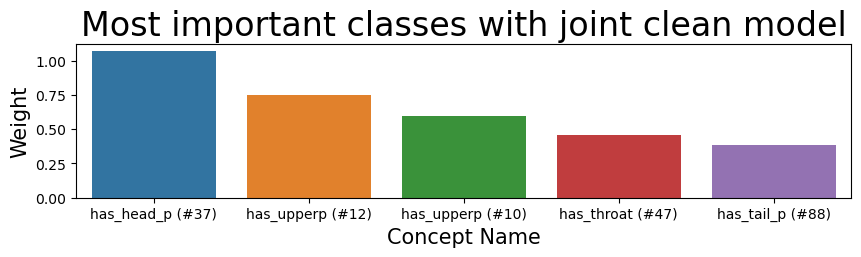

In [34]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with joint clean model",fontsize=24)
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_small,CUB_ATTRIBUTES)

[1.042615532875061, 0.9918433427810669, 0.877951443195343, 0.5534395575523376, 0.519017219543457] ['has_head_p (#37)', 'has_upperp (#10)', 'has_upperp (#12)', 'has_wing_c (#9)', 'has_breast (#23)']


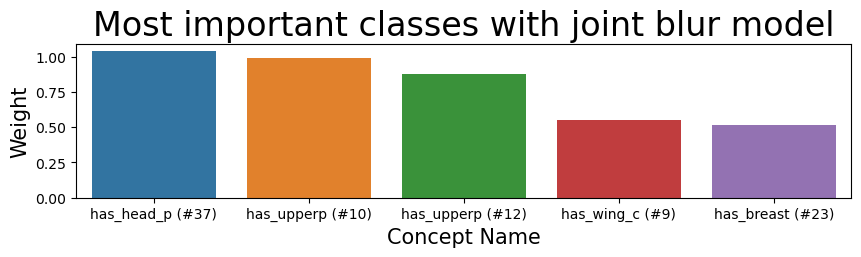

In [35]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with joint blur model",fontsize=24)
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_blur,CUB_ATTRIBUTES)

[0.9226559400558472, 0.6780495643615723, 0.6248978972434998, 0.602060854434967, 0.4921078085899353] ['has_belly_ (#89)', 'has_back_c (#29)', 'has_tail_p (#86)', 'has_belly_ (#75)', 'has_under_ (#59)']


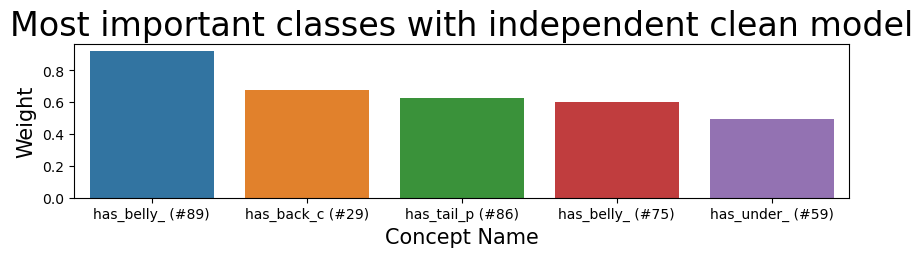

In [36]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with independent clean model",fontsize=24)
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_small_independent,CUB_ATTRIBUTES)

[0.7076894044876099, 0.450435072183609, 0.42779433727264404, 0.41931048035621643, 0.41036897897720337] ['Extra Node (#112)', 'has_belly_ (#74)', 'has_breast (#24)', 'has_bill_c (#99)', 'has_belly_ (#75)']


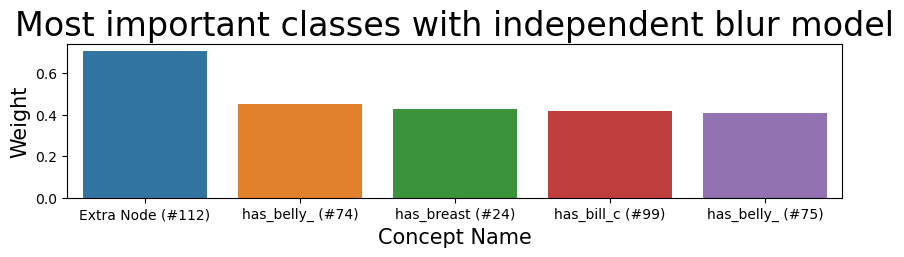

In [37]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with independent blur model",fontsize=24)
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_blur_independent,CUB_ATTRIBUTES)

[0.11461678147315979, 0.10813675075769424, 0.09791732579469681, 0.05074971914291382, 0.022100258618593216] ['has_tail_p (#86)', 'has_size:: (#79)', 'has_belly_ (#89)', 'has_bill_s (#1)', 'has_back_p (#83)']


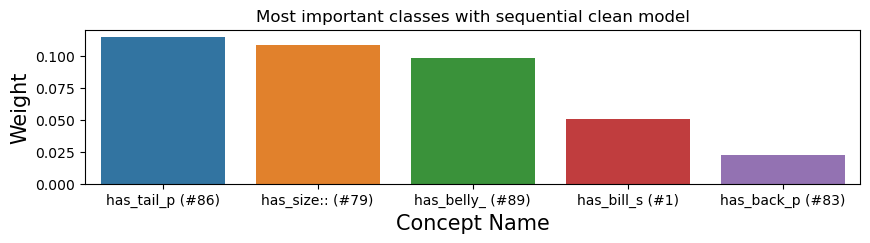

In [40]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with sequential clean model")
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_small_sequential,CUB_ATTRIBUTES)

[0.1047367975115776, 0.09698696434497833, 0.08148669451475143, 0.04920794814825058, 0.02334977686405182] ['has_size:: (#79)', 'Extra Node (#112)', 'has_bill_s (#1)', 'has_tail_p (#86)', 'has_underp (#17)']


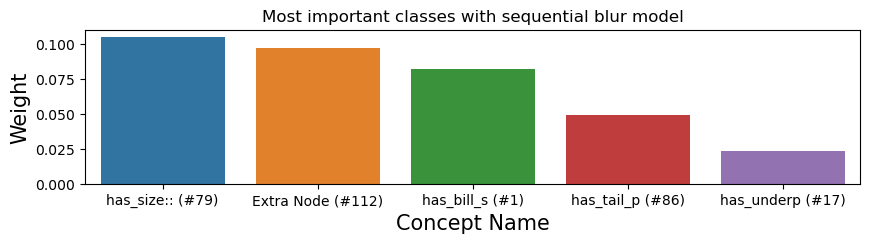

In [41]:
plt.figure(figsize=(10,2))
plt.title("Most important classes with sequential blur model")
plt.xlabel("Concept Name",fontsize=15)
plt.ylabel("Weight",fontsize=15)
plot_most_important_classes(weights_blur_sequential,CUB_ATTRIBUTES)

In [70]:
weights_small_sequential, c_pred_small_sequential = get_attribute_class_weights([sequential_concept_model_small,
                                                        sequential_bottleneck_model_small],
                                                       run_independent_model,
                                                       sequential_bottleneck_model_small.linear.weight)

In [75]:
weights_blur_sequential, c_pred_blur_sequential = get_attribute_class_weights([sequential_concept_model_small,
                                                        sequential_bottleneck_model_blur],
                                                       run_independent_model,
                                                       sequential_bottleneck_model_blur.linear.weight) #TODO: Change this back

In [84]:
np.argsort(np.abs(c_pred_small[:,0].detach().numpy()))[::-1]

array([ 37,  11,  47,  13,  10,  97,  91,  41,  61,  46,  55,  65,  89,
        25,  62,   7,  78,  12,  27,  35,  17,  98,  21,  15, 101,  28,
        30,  48,  60,  39,  38,  50,  26,  94,  54,  87,  95, 111,  81,
         9,  24, 110,  76,  69,  57, 100,  71, 105, 102,  83,   2,  74,
        77,  86, 103, 108,   6,  58,  56,  79,  29,  20, 106,   4, 104,
        14,  44,  59,  84,  49,  31,  66,  33,  80,  43,   1,  82,   8,
        32,  99,  92,  72,  68,  19,  53,  90,   5,  63,  42,  40,  16,
        96,   0,  70,  93,  85,  88, 112,  18,  45,  51,  52,  22,  23,
       107,   3,  67,  34,  64,  73,  36, 109,  75])

In [85]:
np.argsort(np.abs(c_pred_blur[:,0].detach().numpy()))[::-1]

array([ 98,  37,   9,  70,  64,  27, 106,  10,  24,  95,  33,  48,  30,
         2,  88,  68,  84,  71, 102,  61,  21,   3,  78,  29,  42,  62,
        11,  44,  31,  36,  54,  87,  25,  26, 100, 104, 111,  85,  43,
       109,  97,  59,  23,  35,  45, 103,  58,  39,  38,  60,  55,  90,
        41,  53,  13,  80,  99,  82,  74,  67,  32,  63,  15,  17,  94,
        52,  46,  86,  73,  96,  91,  72,  76,  93,  20, 108,  77, 110,
        22,   6,  65,   7,  49,  56,  16,  34,   1,   8,  81, 112,   5,
        89,  79, 105,  47,  83,  57,  51,   0, 107,  50,  18,  66,   4,
        40, 101,  19,  69,  92,  14,  75,  28,  12])

In [86]:
weights_small[0,:,0]

tensor([    -0.0391,      0.0120,      0.0941,     -0.0121,     -0.0040,
            -0.0239,      0.1696,     -0.2124,      0.0591,      0.2914,
             0.7421,      0.2798,      0.4949,     -0.1559,     -0.1402,
            -0.1997,     -0.0761,      0.1261,     -0.0116,     -0.0788,
            -0.0080,      0.1970,      0.0051,      0.0179,      0.2297,
             0.0200,     -0.0618,     -0.0560,     -0.1719,     -0.0082,
             0.3601,     -0.0251,      0.0970,      0.0493,      0.0089,
            -0.0100,     -0.0012,      0.8855,      0.0112,     -0.0349,
             0.0127,      0.3686,     -0.0210,      0.0155,      0.0261,
            -0.0176,      0.2473,      0.4621,      0.2031,      0.0222,
             0.2027,     -0.0029,      0.0029,      0.0270,      0.0654,
             0.1511,     -0.0275,      0.0690,      0.0098,      0.0036,
             0.0837,      0.3995,      0.1810,      0.0303,     -0.0017,
             0.3589,     -0.1170,     -0.0035,     

In [87]:
weights_blur[0,:,0]

tensor([    -0.0268,     -0.0111,      0.2104,      0.2698,     -0.0050,
            -0.0000,     -0.0924,      0.0658,      0.0589,      0.6320,
             0.6149,      0.1426,     -0.0008,      0.0974,     -0.0209,
            -0.1075,     -0.0754,     -0.0396,      0.0115,     -0.0208,
            -0.0242,      0.2175,     -0.0489,      0.2043,      0.4379,
            -0.0131,     -0.0271,      0.0392,     -0.0070,      0.1217,
             0.4329,      0.2037,     -0.1272,     -0.1519,      0.0616,
             0.0401,     -0.2057,      0.9318,      0.0654,     -0.0002,
            -0.0018,      0.1221,      0.1870,     -0.0231,      0.1192,
             0.2079,      0.0577,      0.0576,      0.3142,      0.0327,
             0.0286,      0.0114,      0.0153,      0.0181,      0.0322,
             0.0369,      0.0069,     -0.0104,      0.0443,      0.0545,
             0.0307,      0.2850,      0.1278,      0.0878,      0.3282,
            -0.0496,      0.0259,      0.0624,     

In [88]:
weights_tag[0,:,0]

tensor([    -0.1253,      0.0160,      0.1201,      0.1862,      0.0774,
             0.0062,     -0.0706,     -0.0202,      0.2883,      0.4850,
             0.5946,      0.1762,      0.0966,     -0.0343,     -0.0591,
            -0.2057,     -0.1675,      0.0350,     -0.0204,     -0.0884,
            -0.0256,      0.2286,     -0.0638,     -0.0534,      0.1845,
            -0.0042,     -0.0173,      0.0096,      0.0005,      0.0991,
             0.4948,      0.2260,     -0.0212,     -0.0538,     -0.0385,
             0.0513,     -0.1113,      1.3035,      0.0176,      0.0076,
             0.0010,      0.1871,      0.1178,     -0.0169,      0.0366,
             0.3238,      0.1030,      0.2252,      0.3184,      0.0788,
             0.0904,      0.0195,     -0.0012,     -0.0022,      0.0133,
             0.0622,      0.0117,     -0.0026,      0.0364,      0.0363,
             0.0230,      0.0464,      0.1709,      0.2150,      0.2370,
            -0.0636,     -0.0175,     -0.0144,     

In [89]:
diff = weights_blur - weights_small

In [90]:
np.argsort(diff[0,:,0].detach().numpy())[::-1]

array([ 87,  98, 106,   9,  64, 110,  88, 100,   3,   7,  68,  13, 104,
        70,  31,  45,  24,  42,  80,  71,  23,  28,  90,  66,  29,  14,
         2,  91,  48, 109, 103,  27,  44,  15, 102,  30,  67,  85,  19,
        63,  38,  34, 111,  59,  73,  35,  74,  37, 101,  26,  39,  58,
        56, 112,  92,   5,  99,  18,  21,  75,  77,  82,  51, 107,  52,
         0,  49,  95,  16,   8,   4,  84,  53,  40,  20,  76,  96,  86,
         1,  93,  25,  54,  43, 108,  94,  60,  62,  22,  97,  83,  79,
       105,  57,  81,  55,  61,  10,  78,  11,  89,  69,  17,  50,  72,
        46,  33,  36,  32,  41,   6,  47,  65,  12])

In [91]:
sorted(diff[0,:,0].detach().numpy())[::-1]

[0.38047573,
 0.3441391,
 0.34406883,
 0.3406014,
 0.32985005,
 0.32686207,
 0.31703708,
 0.28200805,
 0.28196684,
 0.2781474,
 0.25487047,
 0.25327218,
 0.24626836,
 0.23962307,
 0.22873323,
 0.22548562,
 0.20821504,
 0.20797527,
 0.20103587,
 0.19431889,
 0.1864089,
 0.16494149,
 0.15144882,
 0.14282212,
 0.12993422,
 0.11921292,
 0.11634944,
 0.11327304,
 0.11109193,
 0.10636666,
 0.09938532,
 0.09516603,
 0.093132466,
 0.09223125,
 0.09214011,
 0.07283932,
 0.06586409,
 0.058341693,
 0.057940304,
 0.057541072,
 0.05422468,
 0.052668836,
 0.051996324,
 0.050926976,
 0.050690334,
 0.050081998,
 0.04656795,
 0.046266437,
 0.035634886,
 0.03467671,
 0.034654245,
 0.034549966,
 0.034399137,
 0.03301236,
 0.028801132,
 0.023854021,
 0.023653407,
 0.023189422,
 0.0204425,
 0.01703069,
 0.01669535,
 0.015551974,
 0.014315973,
 0.012522027,
 0.01240322,
 0.01236978,
 0.010522537,
 0.0072115175,
 0.0006730184,
 -0.00029005483,
 -0.0010333997,
 -0.0041278237,
 -0.008960072,
 -0.014544837,
 -0

In [92]:
c_pred_small[23,0], c_pred_blur[23,0]

(tensor(0.1547, grad_fn=<SelectBackward0>),
 tensor(2.3902, grad_fn=<SelectBackward0>))

In [93]:
weights_small[0,23,0],weights_blur[0,23,0] 

(tensor(0.0179, grad_fn=<SelectBackward0>),
 tensor(0.2043, grad_fn=<SelectBackward0>))

In [94]:
diff = weights_tag - weights_small

In [95]:
np.argsort(diff[0,:,0].detach().numpy())[::-1]

array([ 88,  37,  45,  71,  31,  90,  64,  87, 104,   8,   3,   9,   7,
        63,  28,  68,  70,  42,  30,  13, 100,  48,  29,  74,  66, 112,
       103,   4,  14, 109,  98,  27,  35,  49,  73, 102,  91,  26,  39,
        93,  56, 107,  95,  85,  99,  59,  21,  80,   5,  58,   2,  86,
        51,  82,  92,  77, 111,  44,  38,   1, 110,  84, 106,  52,  15,
        18,  19,  62,  67,  40,  96,  20,  83,  25,  53,  43,  76,  24,
        34,  54,  81, 101, 108,  60,  22,  23,  57,  75,   0,  55,  17,
        16, 105,  97,  89,  33,  11,  36,  50,  32,  46,  10,  94,  79,
        78,  41,  69,  72,  47,   6,  61,  12,  65])

In [96]:
np.argsort(weights_blur[0,:,0].detach().numpy())[::-1]

array([ 37,  98,   9,  10,  24,  30,  71,  88,  64,  48, 106,  61,   3,
        87,  70,  21,  68,   2,  45,  90,  23,  31, 100,  42, 102, 104,
        86,  11, 103,  62,  41,  29,  44, 110,  80, 109,  74,  13, 111,
        78,  63,  94,   7,  38,  67,  34,   8,  46,  47,  85,  59,  73,
       112,  58,  81,  83,  35,  27,  55,  49,  54,  60,  76,  79,  50,
        66,  53,  75,  52,  18,  51, 105, 107, 108,  56,  99,   5,  39,
        12,  40,  92,   4,  28,  82,  57,   1, 101,  25,  69,  89,  84,
        19,  14,  43,  20,  91,   0,  26,  93,  17,  22,  65,  95,  96,
        97,  77,  16,   6,  72,  15,  32,  33,  36])

In [97]:
np.argsort(weights_small_independent[0,:,0].detach().numpy())[::-1]

array([ 79,  86,  89,  22,  83,  50,  93,   7,  47,  13,  28,  48,  35,
        29,  30,  31,  51,  32,  49,  33,  37,  36,  38,  27,  40,  41,
        42,  43,  44,  45,  46,  39, 112,  26,  12,   1,   2,   3,   4,
         5,   6,   8,   9,  10,  11,  14,  25,  15,  16,  17,  18,  19,
        20,  21,  23,  24,  54,  53,  56,  55,  97,  84,  85,  87,  88,
        90,  91,  92,  94,  95,  96,  98,  80,  99, 100, 101, 102, 103,
       104, 105, 107, 109, 110,  82,  81,  78,  69, 111,  58,  59,  60,
        62,  63,  64,  65,  68,  66,  70,  71,  72,  73,  74,  75,  76,
        77,   0,  57,  34,  67,  61,  52, 106, 108])

In [98]:
np.argsort(weights_blur_independent[0,:,0].detach().numpy())[::-1]

array([112,  86,  89,  83,  22,  51,  50,   3,  39,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  41,  40,  28,  42,  43,  44,  45,  46,
        47,  48,  49,  52,  29,  27,   4,  26,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,   2,
        23,   1,  24,  25,  54,  53,  56,  55,  98,  85,  87,  88,  90,
        91,  92,  93,  94,  95,  96,  97,  99, 111, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110,  84,  82,  81,  80,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,   0])

In [66]:
weights_blur_independent[0,:,0].detach().numpy()

array([ 0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.0817598 ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.03501512,  0.06797784, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.  

In [73]:
c_pred_small_sequential[:,0].detach().numpy()

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [76]:
c_pred_blur_sequential[:,0].detach().numpy()

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [71]:
weights_small_sequential[0,:,0].detach().numpy()

array([ 0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.04696898,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.00337534,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.12491178,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.03881535,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.01006048,  0.        , -0.        ,
        0.07032999,  0.        , -0.08042116,  0.        ,  0.        ,
        0.        ,  0.        , -0.01053926,  0.        , -0.        ,
        0.        , -0.07499699,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.06238306, -0.        , -0.  

In [77]:
weights_blur_sequential[0,:,0].detach().numpy()

array([ 0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.04905807,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.00582556,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.0817598 ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.02985368,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.01860572,  0.        , -0.        ,
        0.03501512,  0.        , -0.07834717,  0.        ,  0.        ,
        0.        ,  0.        , -0.00795037,  0.        , -0.        ,
        0.        , -0.07203895,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.06045915, -0.        , -0.  

In [54]:
np.argsort(weights_blur_sequential[0,:,0].detach().numpy())[::-1]

array([ 79,   1,  86,  17,  89,  83,  22,  51,  50,  48,  36,  29,  30,
        31,  32,  33,  34,  35,  49,  47,  37,  38,  28,  40,  41,  42,
        43,  44,  45,  46,  39, 112,  27,  26,   2,   3,   4,   5,   6,
         7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  18,  19,  20,
        21,  23,  24,  25,  53,  52,  56,  54,  98,  85,  87,  88,  90,
        91,  92,  93,  94,  95,  96,  97,  99,  55, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110,  84,  82,  81,  80, 111,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,   0])

In [99]:
torch.sum(weights_small_independent[:,:,0],dim=1)

tensor([ 0.6395,  1.0745,  1.4390,  1.8093,  2.0615,  1.1093,  2.6543,  2.3964,
         2.0087,  1.7180,  1.4593,  1.8931, -0.1466, -0.1335, -0.2504, -0.2287,
         0.1318, -0.1362,  0.2094, -0.0162, -0.3440, -0.1518,  0.0822, -0.1274,
        -0.3926, -0.1648, -0.2654, -0.4605, -0.0696, -0.4897, -0.5569, -0.5202,
         0.0761, -0.0232, -0.0917, -0.1023, -0.5122,  0.0245, -0.1996, -0.0996,
         0.0137, -0.3597,  0.0276,  0.0173,  0.0920,  0.6737, -0.1222, -0.3112,
         0.2347, -0.0158, -0.2727, -0.0150,  0.2241, -0.1089, -0.2709, -0.3137,
        -0.0752, -0.1303,  0.0613, -0.2456, -0.1328, -0.1428, -0.2432, -0.2325,
        -0.1286, -0.2930,  0.1225, -0.0612, -0.6892,  0.2522, -0.3215, -0.2160,
         0.0769,  0.0819, -0.1151, -0.2351, -0.3039, -0.2718, -0.3550, -0.3927,
        -0.1813, -0.0645, -0.1413, -0.4385, -0.0220, -0.0265, -0.2218,  0.2978,
        -0.0056,  0.0776, -0.1621, -0.3380, -0.2346,  0.3357, -0.2221,  0.1385,
        -0.0269, -0.0468, -0.0779, -0.14

In [61]:
weights_small_independent[0,:,1]

tensor([ 0.0000,  0.2462, -0.0000,  0.0000, -0.0000,  0.0000, -0.0000,  0.0470,
         0.0000, -0.0000,  0.0000,  0.0000,  0.0000,  0.0034,  0.0000, -0.0000,
         0.0000,  0.0000, -0.0000,  0.0000, -0.0000, -0.0000,  0.1249,  0.0000,
        -0.0000, -0.0000, -0.0000, -0.0000,  0.0014, -0.0000,  0.0000, -0.0000,
         0.0000,  0.0000, -0.0388,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000,
         0.0000, -0.0000,  0.0000,  0.0000,  0.0000, -0.0000,  0.0000,  0.0101,
         0.0000, -0.0000,  0.0703,  0.0000, -0.0804,  0.0000,  0.0000,  0.0000,
         0.0000, -0.0105,  0.0000, -0.0000,  0.0000, -0.0750,  0.0000, -0.0000,
         0.0000, -0.0000,  0.0000, -0.0624, -0.0000, -0.0000,  0.0000,  0.0000,
         0.0000, -0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  0.2431,
        -0.0000, -0.0000,  0.0000,  0.1240,  0.0000, -0.0000,  0.2161, -0.0000,
        -0.0000,  0.1907,  0.0000, -0.0000,  0.0000,  0.0546, -0.0000, -0.0000,
         0.0000, -0.0000, -0.0000, -0.00

In [62]:
np.argsort(weights_blur_independent[0,:,0].detach().numpy())[::-1]

array([112,  86,  89,  83,  22,  51,  50,   3,  39,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  41,  40,  28,  42,  43,  44,  45,  46,
        47,  48,  49,  52,  29,  27,   4,  26,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,   2,
        23,   1,  24,  25,  54,  53,  56,  55,  98,  85,  87,  88,  90,
        91,  92,  93,  94,  95,  96,  97,  99, 111, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110,  84,  82,  81,  80,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,   0])

### Saliency Maps

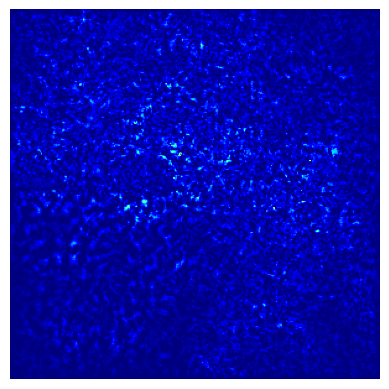

In [83]:
plot_saliency(joint_model_small,run_joint_model,112,transformed_images_tensor)

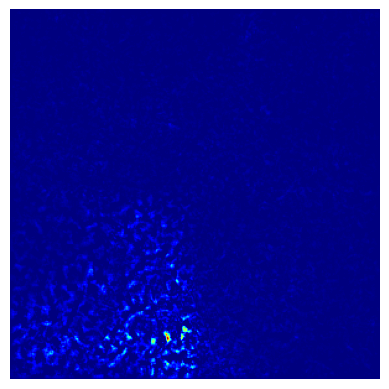

In [80]:
plot_saliency(joint_model_blur,run_joint_model,112,transformed_images_tensor)

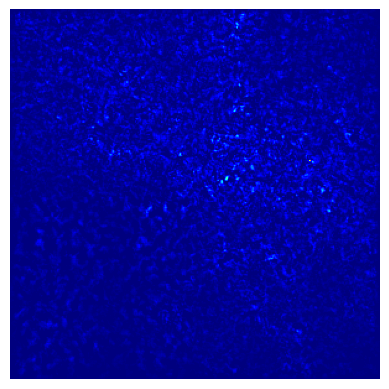

In [84]:
plot_saliency(joint_model_small,run_joint_model,37,transformed_images_tensor)

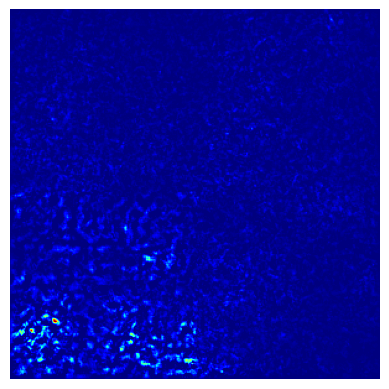

In [85]:
plot_saliency(joint_model_blur,run_joint_model,37,transformed_images_tensor)

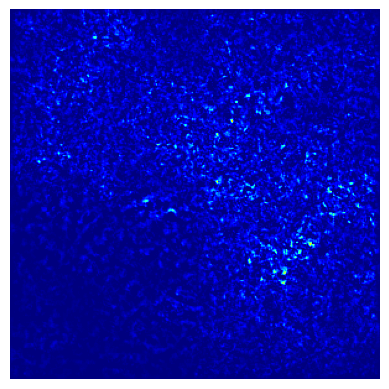

In [93]:
plot_saliency([independent_concept_model_small,independent_bottleneck_model_small],run_independent_model,112,transformed_images_tensor)

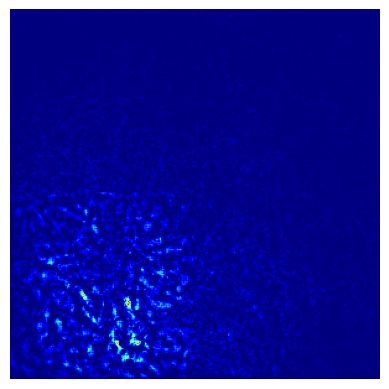

In [94]:
plot_saliency([independent_concept_model_blur,independent_bottleneck_model_blur],run_independent_model,112,transformed_images_tensor)

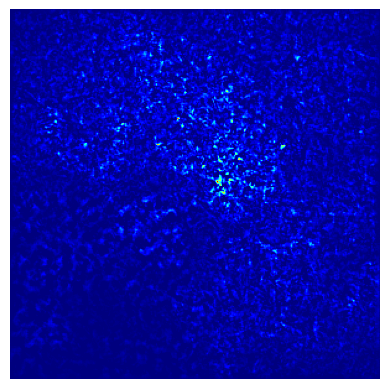

In [96]:
plot_saliency([independent_concept_model_small,independent_bottleneck_model_small],run_independent_model,37,transformed_images_tensor)

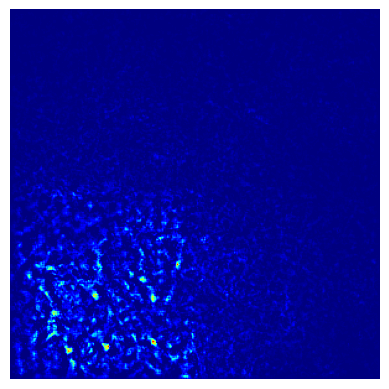

In [95]:
plot_saliency([independent_concept_model_blur,independent_bottleneck_model_blur],run_independent_model,37,transformed_images_tensor)

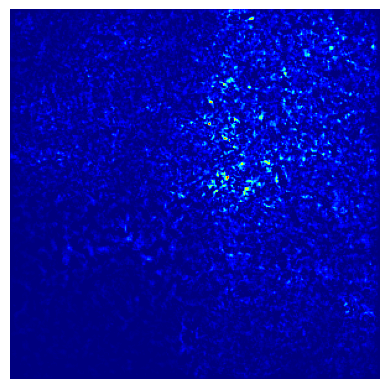

In [103]:
plot_saliency([independent_concept_model_small,independent_bottleneck_model_small],run_independent_model,1,transformed_images_tensor)

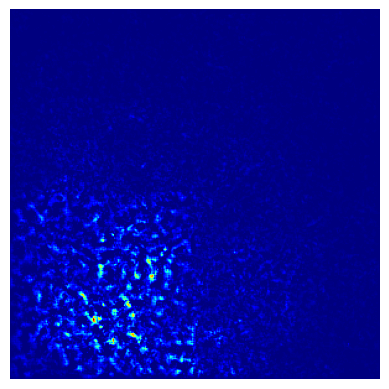

In [104]:
plot_saliency([independent_concept_model_blur,independent_bottleneck_model_blur],run_independent_model,1,transformed_images_tensor)

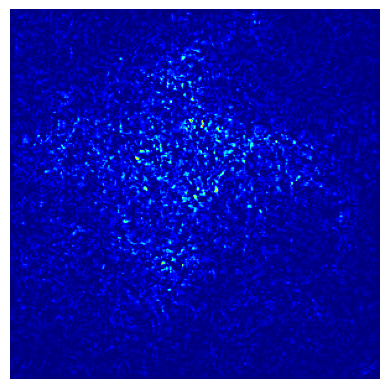

In [20]:
plot_saliency(joint_model_blur,run_joint_model,112,x_small)

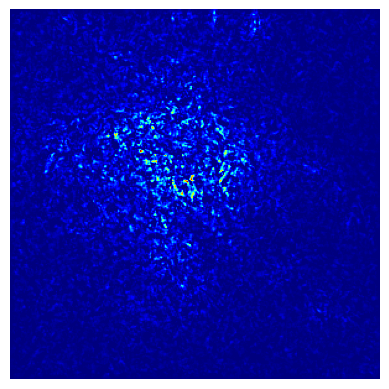

In [21]:
plot_saliency(joint_model_blur,run_joint_model,37,x_small)

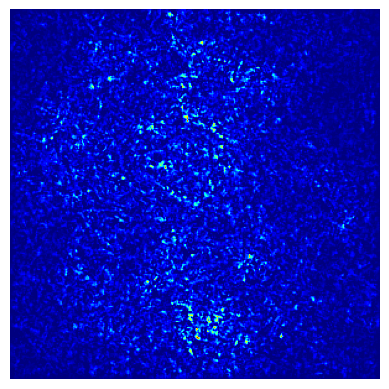

In [25]:
plot_saliency([independent_concept_model_blur,independent_bottleneck_model_blur],run_independent_model,112,x_small)

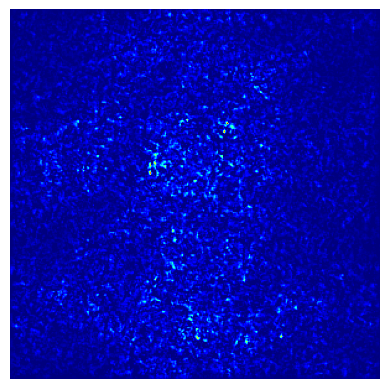

In [26]:
plot_saliency([independent_concept_model_blur,independent_bottleneck_model_blur],run_independent_model,37,x_small)